# Nadgledano učenje

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [3]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

Dataset nema duplikata ni nedostajućih vrednosti

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Temparatura (°C) | Prosečna temperatura vazduha |
| Vlažnost (%) | Relativna vlažnost vazduha |
| PM2.5 (µg/m³)  | Nivo prisutnosti sitnih čestica   |
| PM10 (µg/m³)  | Nivo prisutnosti krupnih čestica    |
| NO2  (ppb)  |   Koncentracija azot-dioksida  |
| S02 (ppb)   | Koncentracija sumpor-dioksida   |
| CO (ppb)   | Koncentracija ugljen-monoksida    |
| Blizina_industrije   (km) |  Daljina do najbliže industrijske zone   |
| Gustina_populacije (people/km²)   | Broj ljudi po kvadratnom kilometru    |
| Kvalitet_vazduha | Stepen zagađenosti vazduha |

## Kvalitet vazduha
* Dobar: Čist vazduh sa niskim nivoima zagađenja 
* Umeren: Prihvatljiv kvalitet vazduha, ali su prisutni neki zagađivači
* Loš: Uočljivo zagađenje koje može izazvati zdravstvene probleme kod osetljivih grupa
* Opasan: Veoma zagađen vazduh koji predstavlja ozbiljan zdravstveni rizik za populaciju

In [4]:
df = df.rename(columns={
    'Temperature':'Temperatura',
    'Humidity':'Vlažnost',
    'Air Quality': 'Kvalitet_Vazduha',
    'Proximity_to_Industrial_Areas': 'Blizina_Industrije',
    'Population_Density':'Gustina_Populacije'
})
df['Kvalitet_Vazduha'] = df['Kvalitet_Vazduha'].replace({
    'Good': 'Dobar',
    'Moderate': 'Umeren',
    'Poor': 'Loš',
    'Hazardous': 'Opasan'
})

if df['Kvalitet_Vazduha'].dtype == 'object': 
    encoder = LabelEncoder()
    df['Kvalitet_Vazduha'] = encoder.fit_transform(df['Kvalitet_Vazduha'])
df.head()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,3
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,3
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,3
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


In [5]:
class_mapping = {i: class_name for i, class_name in enumerate(encoder.classes_)}
print(class_mapping)

{0: 'Dobar', 1: 'Loš', 2: 'Opasan', 3: 'Umeren'}


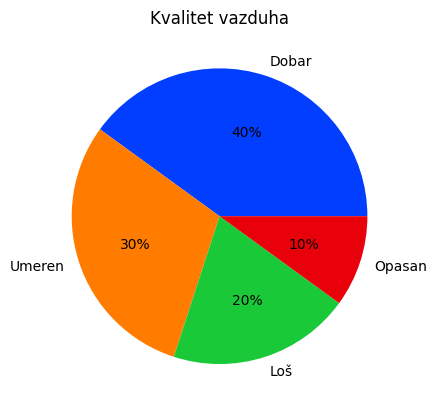

In [6]:
air_quality=df['Kvalitet_Vazduha'].value_counts()
palette_color = seaborn.color_palette('bright') 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Kvalitet vazduha") 
plt.show() 

<Axes: >

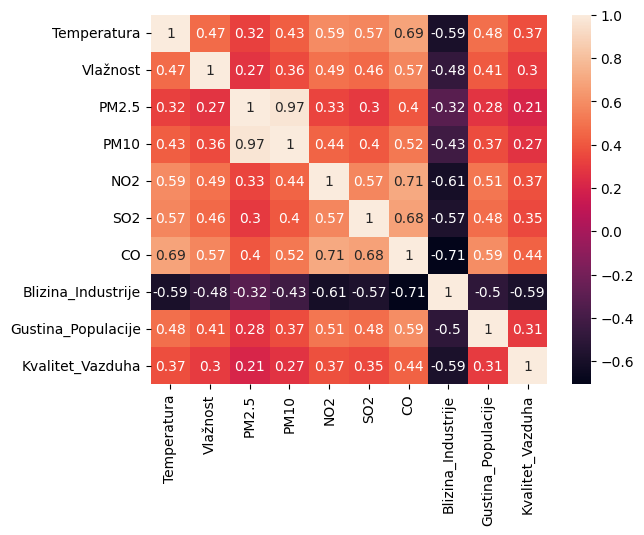

In [7]:
correlation=df.corr()
seaborn.heatmap(correlation,annot=True)

| Karakteristika | Opis
| -------- | ------- |
| Temparatura (°C) | Prosečna temperatura vazduha |
| Vlažnost (%) | Relativna vlažnost vazduha |
| Vlažnost (%)  | Nivo prisutnosti sitnih čestica   |
| PM10 (µg/m³)  | Nivo prisutnosti krupnih čestica    |
| NO2  (ppb)  |   Koncentracija azot-dioksida  |
| S02 (ppb)   | Koncentracija sumpor-dioksida   |
| CO (ppb)   | Koncentracija ugljen-monoksida    |
| Blizina_industrije   (km) |  Daljina do najbliže industrijske zone   |
| Gustina_populacije (people/km²)   | Broj ljudi po kvadratnom kilometru    |
| Kvalitet_vazduha | Stepen zagađenosti vazduha |

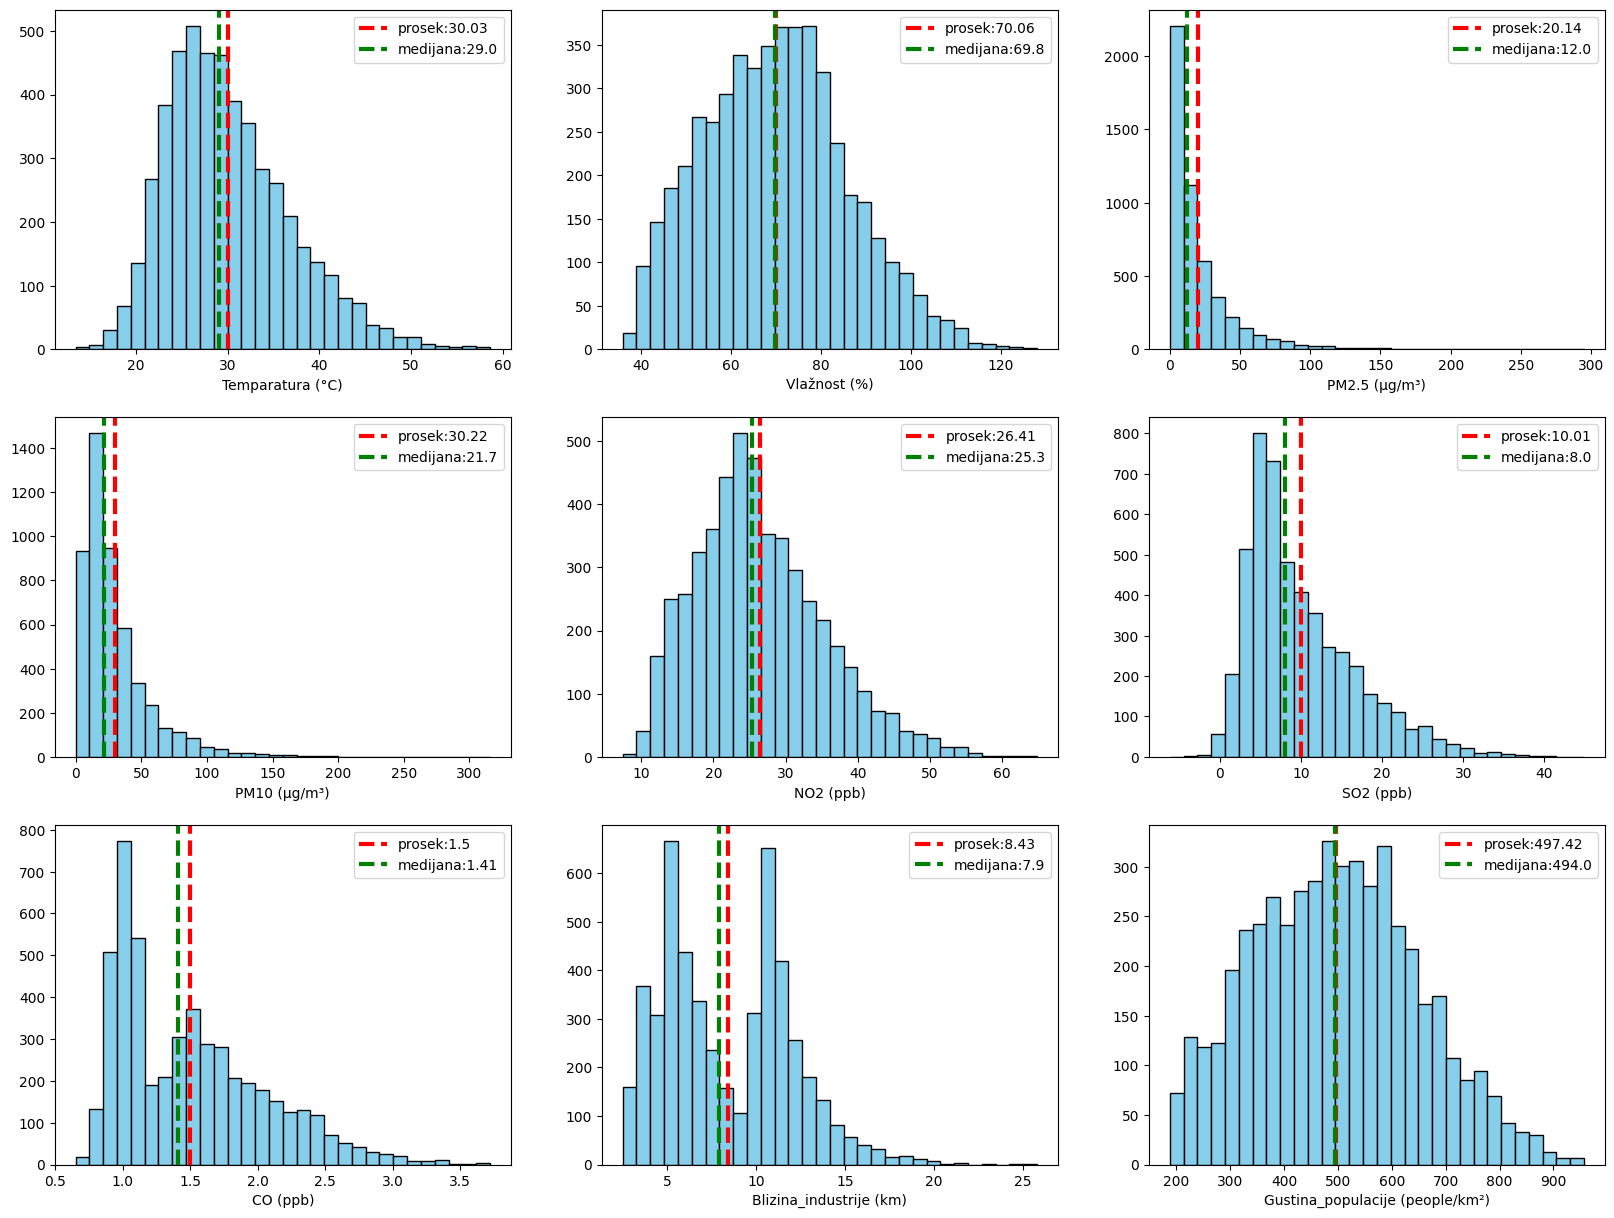

In [8]:
df_simpl=df.drop(columns='Kvalitet_Vazduha')
labels={'Temperatura':'Temparatura (°C)','Vlažnost':'Vlažnost (%)','Vlažnost':'Vlažnost (%)','PM2.5':'PM2.5 (µg/m³)',
        'PM10':'PM10 (µg/m³)','NO2':'NO2 (ppb)', 'SO2':'SO2 (ppb)','CO':'CO (ppb)',
        'Blizina_Industrije':'Blizina_industrije (km)','Gustina_Populacije':'Gustina_populacije (people/km²)',}
plt.figure(figsize=(20,15))
for ind,col in enumerate(df_simpl.columns):
    plt.subplot(3,3,ind+1)
    plt.hist(df_simpl[col], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.xlabel(labels[col])
    plt.legend([f'prosek:{np.round(df[col].mean(),2)}',f'medijana:{np.round(df[col].median(),2)}'])
plt.show()

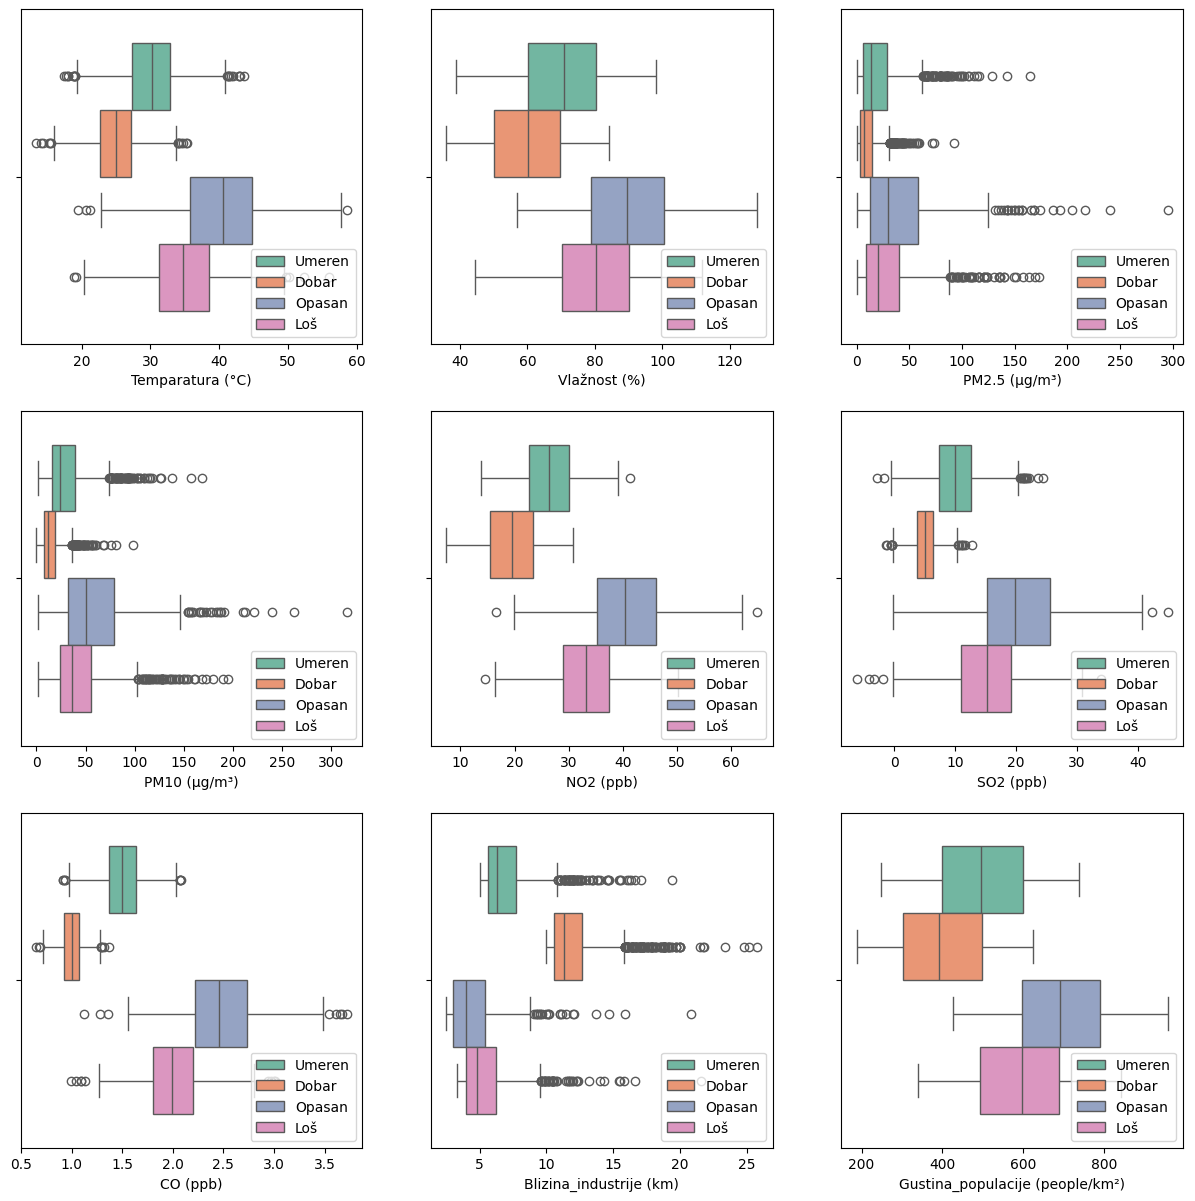

In [9]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(df.drop('Kvalitet_Vazduha', axis=1).columns):
  plt.subplot(4,3,i+1)
  seaborn.boxplot(x = df[col],hue=encoder.inverse_transform(df['Kvalitet_Vazduha']),palette='Set2')
  plt.xlabel(labels[col])
  plt.legend(loc='lower right')

#### Outlier removal (IQR)

In [10]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.268985
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,3.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [11]:
counts = df['Kvalitet_Vazduha'].value_counts().sort_index()
decoded_index = [encoder.classes_[i] for i in counts.index]
counts.index = decoded_index
print(counts)

Dobar     2000
Loš       1000
Opasan     500
Umeren    1500
Name: count, dtype: int64


In [12]:
df_encoded = df.copy()

encoded_labels = encoder.transform(['Dobar', 'Umeren'])

# Filter using encoded values
df_filtered = df_encoded[df_encoded['Kvalitet_Vazduha'].isin(encoded_labels)]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         3500 non-null   float64
 1   Vlažnost            3500 non-null   float64
 2   PM2.5               3500 non-null   float64
 3   PM10                3500 non-null   float64
 4   NO2                 3500 non-null   float64
 5   SO2                 3500 non-null   float64
 6   CO                  3500 non-null   float64
 7   Blizina_Industrije  3500 non-null   float64
 8   Gustina_Populacije  3500 non-null   int64  
 9   Kvalitet_Vazduha    3500 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 300.8 KB


In [13]:
encoded_labels = encoder.transform(['Dobar', 'Umeren'])
# Filter using encoded values
df_filtered = df[df['Kvalitet_Vazduha'].isin(encoded_labels)]
df_original=df[~df['Kvalitet_Vazduha'].isin(encoded_labels)]

for col in df_filtered.columns:
    Q1=np.quantile(df[col],0.25)
    Q3=np.quantile(df[col],0.75)
    IQR=Q3-Q1
    low_lim=Q1-IQR*1.5
    up_lim=Q3+IQR*1.5
    df_filtered=df_filtered[(df_filtered[col]>=low_lim)&(df_filtered[col]<=up_lim)]


# Print value counts with decoded labels
for part, name in zip([df_filtered, df_original], ['Filtered', 'Original']):
    counts = part['Kvalitet_Vazduha'].value_counts().sort_index()
    decoded_index = encoder.inverse_transform(counts.index)
    counts.index = decoded_index
    print(f"{name} counts:\n{counts}\n")

# Recombine DataFrames
df = pd.concat([df_filtered, df_original], ignore_index=True)

# Show info
df.info()

Filtered counts:
Dobar     1981
Umeren    1418
Name: count, dtype: int64

Original counts:
Loš       1000
Opasan     500
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4899 entries, 0 to 4898
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperatura         4899 non-null   float64
 1   Vlažnost            4899 non-null   float64
 2   PM2.5               4899 non-null   float64
 3   PM10                4899 non-null   float64
 4   NO2                 4899 non-null   float64
 5   SO2                 4899 non-null   float64
 6   CO                  4899 non-null   float64
 7   Blizina_Industrije  4899 non-null   float64
 8   Gustina_Populacije  4899 non-null   int64  
 9   Kvalitet_Vazduha    4899 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 382.9 KB


In [14]:
df.describe()

,Temperatura,Vlažnost,PM2.5,PM10,NO2,SO2,CO,Blizina_Industrije,Gustina_Populacije,Kvalitet_Vazduha
count,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000,4899.000000
mean,30.047132,70.071504,19.126434,29.222515,26.445928,10.041743,1.502886,8.414962,497.690549,1.276587
std,6.761235,15.907140,23.361853,26.348800,8.955475,6.789478,0.550001,3.558300,153.454940,1.260175
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.200000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,11.700000,21.300000,25.300000,8.000000,1.410000,8.000000,494.000000,1.000000
75%,34.050000,80.300000,24.900000,36.700000,32.000000,13.800000,1.850000,11.100000,601.000000,3.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,21.600000,957.000000,3.000000


#### Pomoćne funkcije

In [15]:
from sklearn.metrics import confusion_matrix
from IPython.display import display_html

def createConfusionMatrix(target_test,target_predicted):
    matrix = confusion_matrix(np.asarray(target_test),np.asarray(target_predicted))
    class_names=encoder.inverse_transform([0,1,2,3])
    dataframe=pd.DataFrame(matrix,index=class_names,columns=class_names)

    seaborn.heatmap(data=dataframe,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.ylabel("True class")
    plt.xlabel("Predicted class")
    plt.show()
    return dataframe

def createTableReport(report_dict:dict):
    accuracy = report_dict.pop('accuracy')
    df_report = pd.DataFrame(report_dict).transpose()
    
    accuracy_row = pd.Series({'precision': None, 'recall': None, 'f1-score': accuracy, 'support': None}, name='accuracy')
    df_report = pd.concat([df_report, accuracy_row.to_frame().transpose()])
    df_report.round(4)

    return df_report.style.background_gradient(cmap='Blues')

def showReports(dfs,titles):
    htmls = []
    for df, title in zip(dfs, titles):
        html = f"<h4>{title}</h4>" + df.to_html()
        htmls.append(html)

    display_html(''.join(
        f'<div style="display:inline-block; vertical-align:top;text-align:center; padding:6px;">{html}</div>'
        for html in htmls
    ), raw=True)

## Modeli bez transformacije

### Dummy Classification Model

,precision,recall,f1-score,support
Dobar,0.386667,0.410101,0.398039,495.000000
Loš,0.149194,0.148000,0.148594,250.000000
Opasan,0.128713,0.104000,0.115044,125.000000
Umeren,0.276353,0.273239,0.274788,355.000000
macro avg,0.235232,0.233835,0.234116,1225.000000
weighted avg,0.279913,0.285714,0.282537,1225.000000
accuracy,nan,nan,0.285714,nan


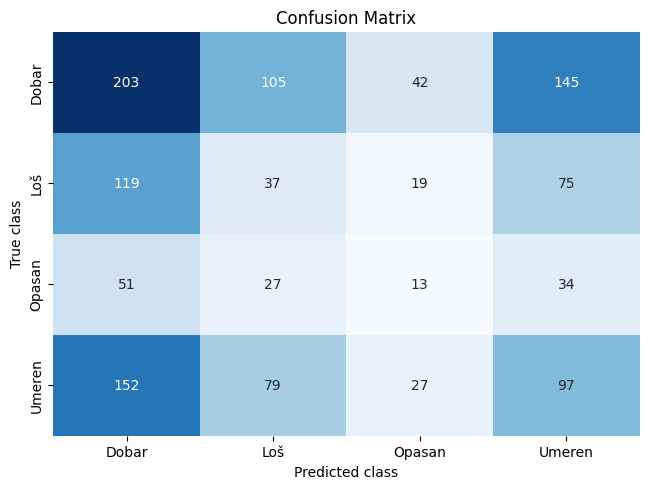

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) #train_size 0.25
dummy=DummyClassifier(strategy='stratified',random_state=0)
target_predicted=dummy.fit(features_train,target_train).predict(features_test)

report_dummy = createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_dummy)
conf_matrix_dummy=createConfusionMatrix(target_test,target_predicted)

* Preciznost, odziv i F1 su veoma niski za sve klase skupa podataka
* Veliki broj pogrešno identifikovanih klasa, uz naglađenje da nijedna predikcija za klasu "Opasan" nije bila tačna
* *Zaključak:* Ne koristiti ovaj model, služi samo kao standard za poređenje

### Logistic regression

,precision,recall,f1-score,support
Dobar,0.976190,0.993939,0.984985,495.000000
Loš,0.555024,0.464000,0.505447,250.000000
Opasan,0.497354,0.752000,0.598726,125.000000
Umeren,0.857585,0.780282,0.817109,355.000000
macro avg,0.721539,0.747555,0.726567,1225.000000
weighted avg,0.807006,0.799184,0.799056,1225.000000
accuracy,nan,nan,0.799184,nan


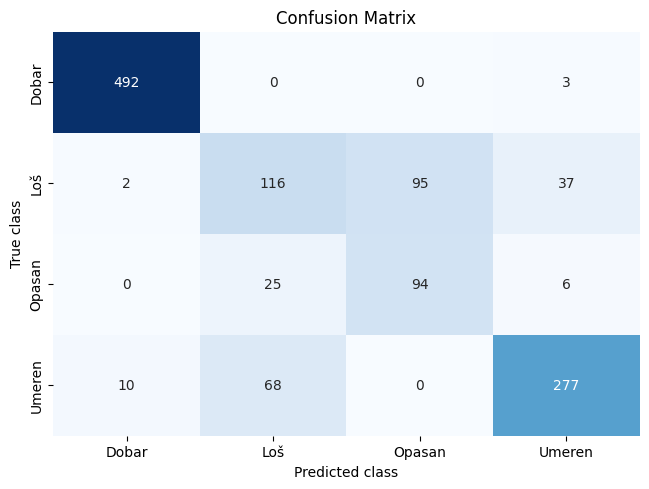

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga', max_iter=5000,class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_pred = model.predict(features_test)

# Evaluation
report_lr=createTableReport(classification_report(target_test, target_pred, target_names=encoder.classes_,output_dict=True))
display(report_lr)
conf_matrix_lr = createConfusionMatrix(target_test,target_pred)

* Odlična preciznost i odziv za klase "Dobar" i "Umeren"
* Nedovoljno velika preciznost za klasu "Opasan" (značajan broj lažno pozitivnih predviđanja)
* *Zaključak:* Bolja predikcija pojedinih klasa, dok se to ne može reći za ključnu "Opasan" klasu

### Random forest model

,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.873518,0.884000,0.878728,250.000000
Opasan,0.882353,0.840000,0.860656,125.000000
Umeren,0.958101,0.966197,0.962132,355.000000
macro avg,0.928493,0.922549,0.925379,1225.000000
weighted avg,0.950040,0.950204,0.950058,1225.000000
accuracy,nan,nan,0.950204,nan


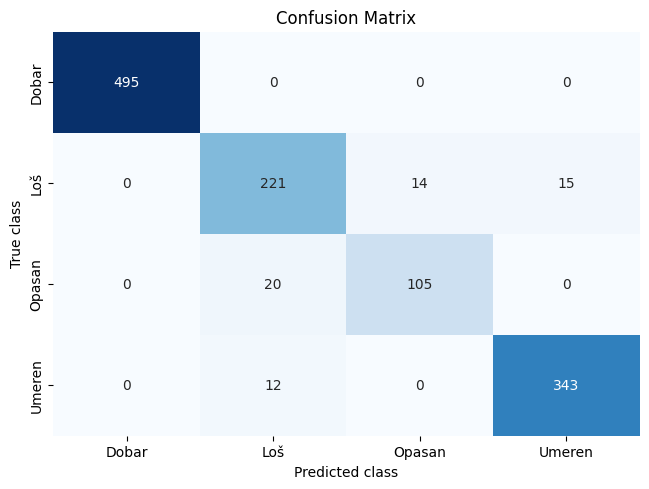

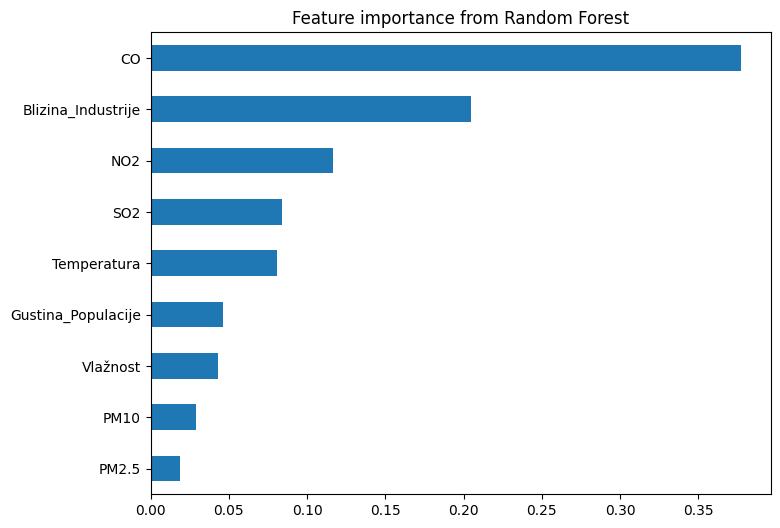

In [18]:
from sklearn.ensemble import RandomForestClassifier

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf)
conf_matrix_rf=createConfusionMatrix(target_test,target_predicted)

feat_importance = pd.Series(rf.feature_importances_, index=features_train.columns)
feat_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature importance from Random Forest')
plt.show()

* Visoka vrednost F1 za većinu klasa
* Nizak odziv za klasu "Opasan", s time da je pogrešna predikcija bila klasa "Loš"
* Na osnovu analize karakteristika koje su najviše uticale na stablo odlučivanja možemo videti da se tu izdvojile CO i Blizina Industrije, kao neke osobine koje smo i očekivale da se pojave
* *Zaključak:* Najbolje ukupne metrike nekog modela, bez skaliranja ulaznog skupa podataka

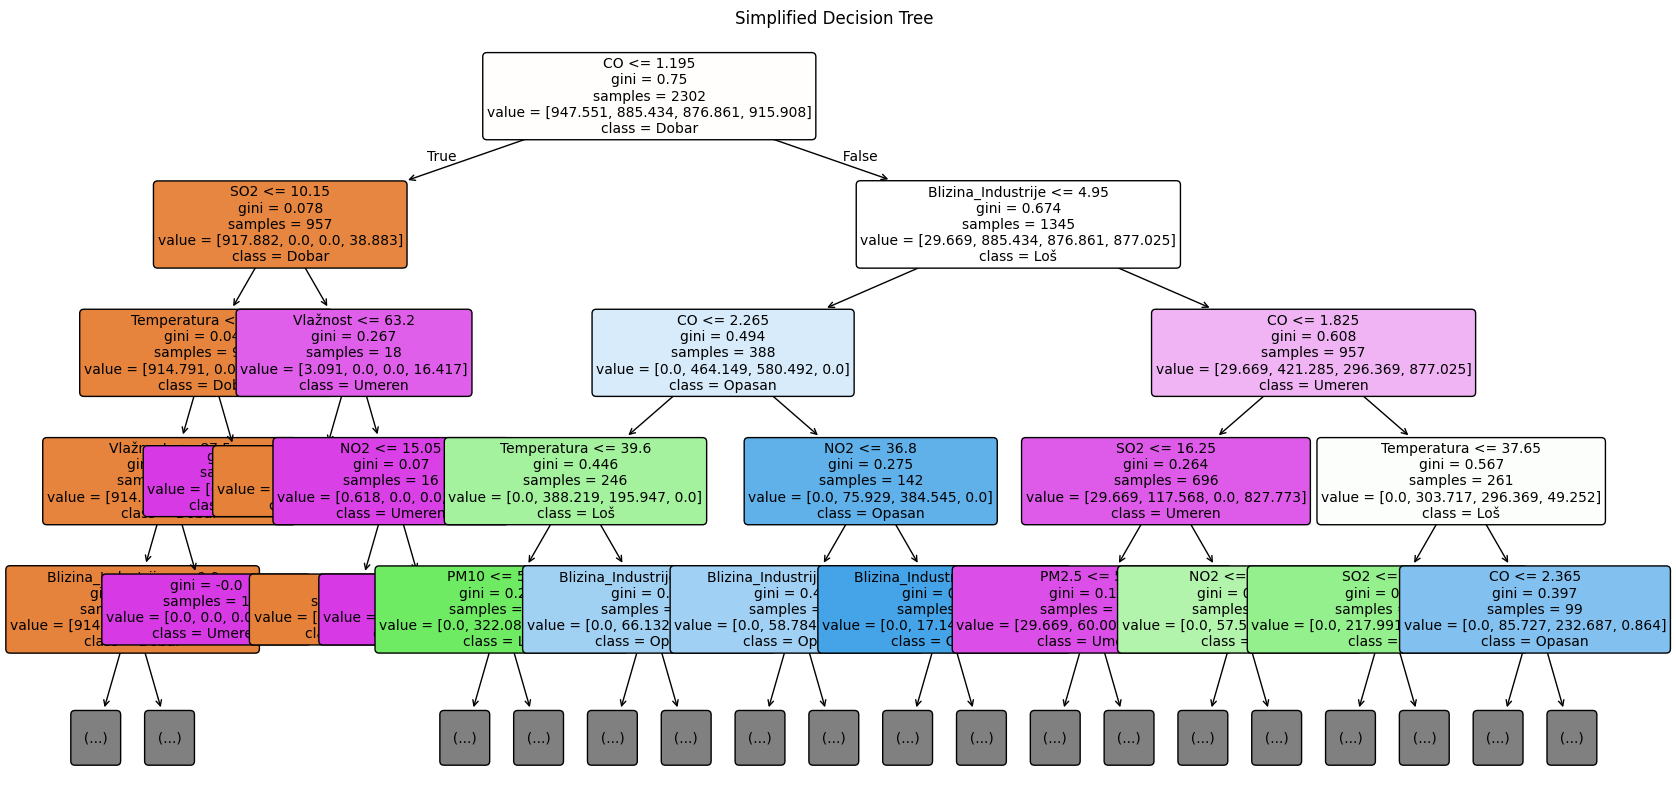

In [19]:
from sklearn.tree import plot_tree
estimator = rf.estimators_[1]

plt.figure(figsize=(20,10))
plot_tree(estimator,
          feature_names=features.columns,
          class_names=encoder.classes_,
          max_depth=4,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Simplified Decision Tree")
plt.show()

### Support Vector Machine

,precision,recall,f1-score,support
Dobar,0.854809,0.951515,0.900574,495.000000
Loš,0.604255,0.568000,0.585567,250.000000
Opasan,0.940000,0.376000,0.537143,125.000000
Umeren,0.660668,0.723944,0.690860,355.000000
macro avg,0.764933,0.654865,0.678536,1225.000000
weighted avg,0.756108,0.748571,0.738428,1225.000000
accuracy,nan,nan,0.748571,nan


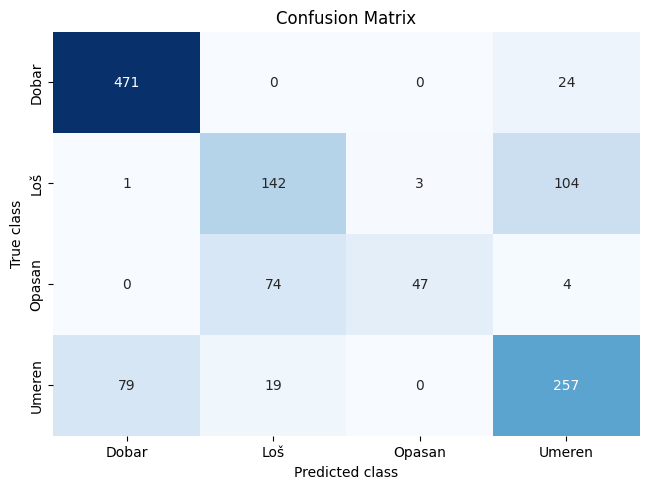

In [20]:
from sklearn.svm import SVC

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc)
conf_matrix_svc=createConfusionMatrix(target_test,target_predicted)

* Generalno dobri rezultati za klasu "Dobar"
* Odziv za klasu "Opasan" je skoro 1, dakle veliki broj tačnih predviđanja
* Klasa "Loš" je imala niže vrednosti za odziv i F1
* *Zaključak:* Model je dao bolje rezultate od Dummy Classifier-a i Logistic Regression, ali ne i od Random Forest-a

### Multinomial Naive Bayes

,precision,recall,f1-score,support
Dobar,0.689474,0.800407,0.740811,491.000000
Loš,0.310559,0.200803,0.243902,249.000000
Opasan,0.331522,0.488000,0.394822,125.000000
Umeren,0.399340,0.342776,0.368902,353.000000
macro avg,0.432724,0.457997,0.437109,1218.000000
weighted avg,0.491189,0.513136,0.495932,1218.000000
accuracy,nan,nan,0.513136,nan


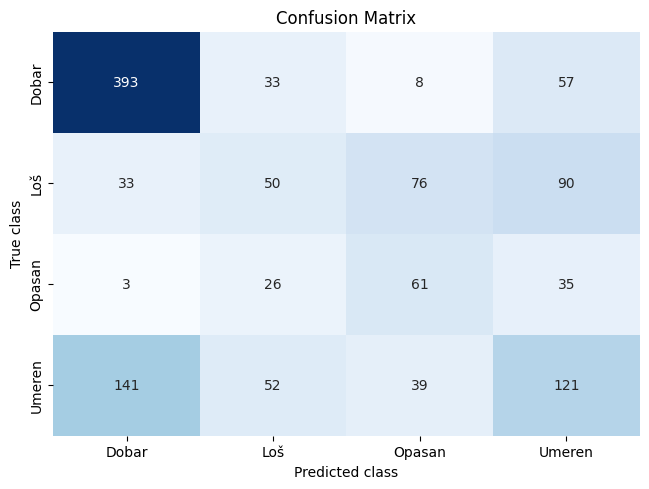

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay


#Uklanjanje redova koje imaju negativne vrednosti karakteristika
df_cleaned = df[(df >= 0).all(axis=1)]

features,target=df_cleaned.drop('Kvalitet_Vazduha',axis=1),df_cleaned['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

nb = MultinomialNB()

nb.fit(features_train, target_train)

target_predicted = nb.predict(features_test)

report_nb=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_nb)
conf_matrix_nb=createConfusionMatrix(target_test,target_predicted)

* Izuzetvo loš odziv za klasu "Opasan", svega jedno tačno predviđanje
* F1 rezultat za klasu "Opasan" je veoma niska
* Slaba robusnost kod nebalansiranih skupova podataka
* *Zaključak:* Model je dao veoma loše rezultate, jedva nešto bolji od Dummy Classifier-a

### KNN (K-Nearest Neighbors)

,precision,recall,f1-score,support
Dobar,0.869176,0.979798,0.921178,495.000000
Loš,0.619718,0.704000,0.659176,250.000000
Opasan,0.847458,0.400000,0.543478,125.000000
Umeren,0.765432,0.698592,0.730486,355.000000
macro avg,0.775446,0.695597,0.713579,1225.000000
weighted avg,0.785985,0.782857,0.773905,1225.000000
accuracy,nan,nan,0.782857,nan


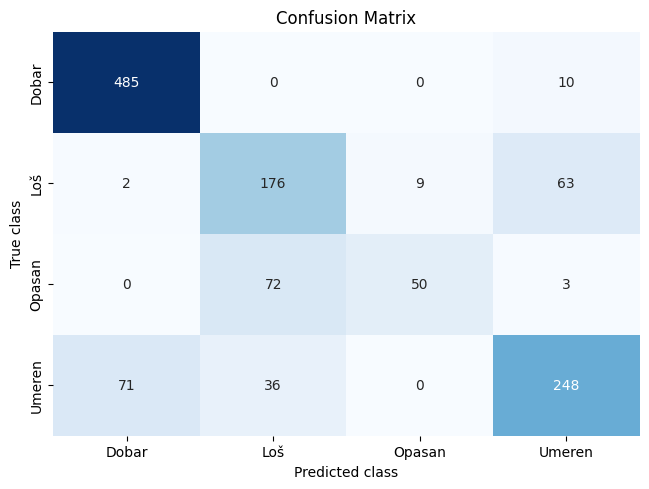

In [22]:
from sklearn.neighbors import KNeighborsClassifier

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train, target_train)

target_predicted = knn.predict(features_test)

report_knn=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn)
conf_matrix_knn=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.681967,0.840404,0.752941,495.000000
Loš,0.458621,0.532000,0.492593,250.000000
Opasan,0.555556,0.320000,0.406091,125.000000
Umeren,0.446640,0.318310,0.371711,355.000000
macro avg,0.535696,0.502678,0.505834,1225.000000
weighted avg,0.555290,0.573061,0.553937,1225.000000
accuracy,nan,nan,0.573061,nan


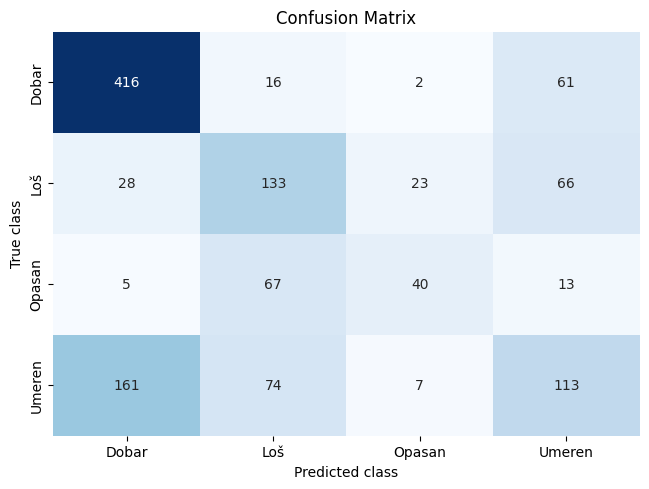

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

features,target=df.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train_pca, target_train)

target_predicted = knn.predict(features_test_pca)

report_knn_pca=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_pca)
conf_matrix_knn_pca=createConfusionMatrix(target_test,target_predicted)

* Odziv, preciznost i F1 za klasu 'Dobar' su visoki, dok je za ostale klase vrednost ovih rezultata manja
* Uvođenjem PCA je došlo do smanjenja kvaliteta predikcije, usled velikog rapsona vrednosti atributa
* *Zaključak:* Ovaj model je dao bolje rezultate od nekih drugih, ali uz lošu predikciju klasa "Loš" i "Opasan"


### Pregled modela

* **Random Forest** dao najbolje performanse po svima klasama, kao i koliko-toliko pristojne rezultate za "Opasan" klasu
* "Dobar" i "Umeren" klase su klasifikovane sa visokom tačnošću kod svih modela usled velike podrške
* Klasa "Opasan" se pokazala kao najproblematičnija usled malog broja primera - svi modeli imaju nizak odziv i F1-score

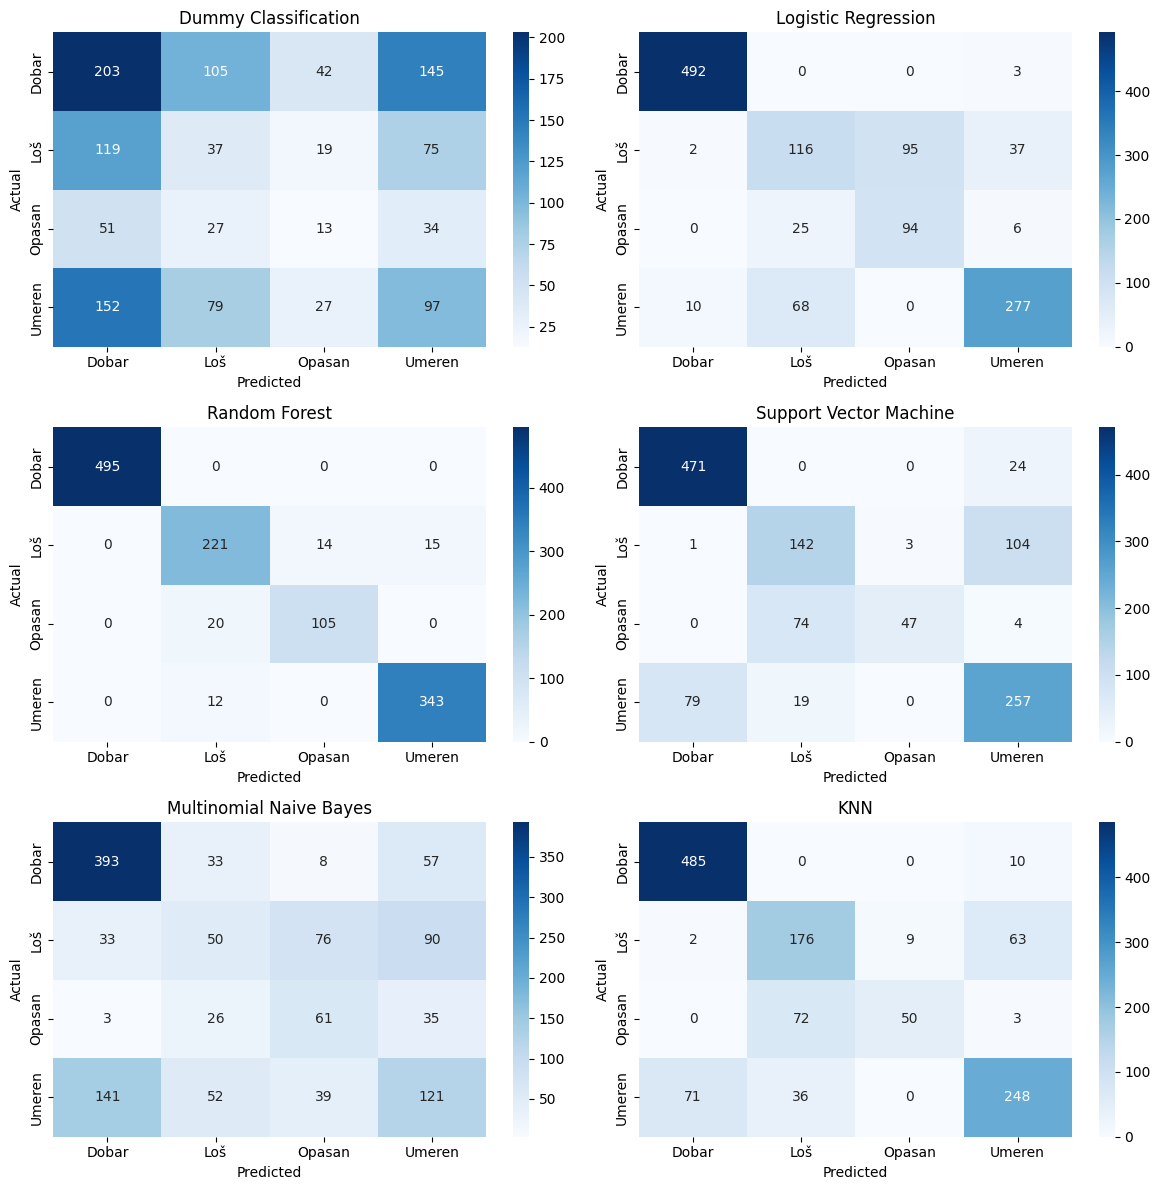

In [24]:
conf_matrixs = {"Dummy Classification":conf_matrix_dummy, "Logistic Regression":conf_matrix_lr,"Random Forest":conf_matrix_rf,
                "Support Vector Machine":conf_matrix_svc,"Multinomial Naive Bayes":conf_matrix_nb,"KNN":conf_matrix_knn}

fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 reda x 2 kolone
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Modeli sa transformacijom

### MinMax i Standard transofrmacija

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
features=df.drop('Kvalitet_Vazduha',axis=1)

data_scalled = std_scaler.fit_transform(features)
df_std = pd.DataFrame(data_scalled, columns=features.columns, index=features.index)
df_std['Kvalitet_Vazduha']=df['Kvalitet_Vazduha']

minmax_scaler = MinMaxScaler()
data_scalled = minmax_scaler.fit_transform(features)
df_minmax = pd.DataFrame(data_scalled, columns=features.columns, index=features.index)
df_minmax['Kvalitet_Vazduha']=df['Kvalitet_Vazduha']

### Logistic Regression

,precision,recall,f1-score,support
Dobar,0.993976,1.000000,0.996979,495.000000
Loš,0.889381,0.804000,0.844538,250.000000
Opasan,0.787234,0.888000,0.834586,125.000000
Umeren,0.947222,0.960563,0.953846,355.000000
macro avg,0.904453,0.913141,0.907487,1225.000000
weighted avg,0.937985,0.937143,0.936798,1225.000000
accuracy,nan,nan,0.937143,nan


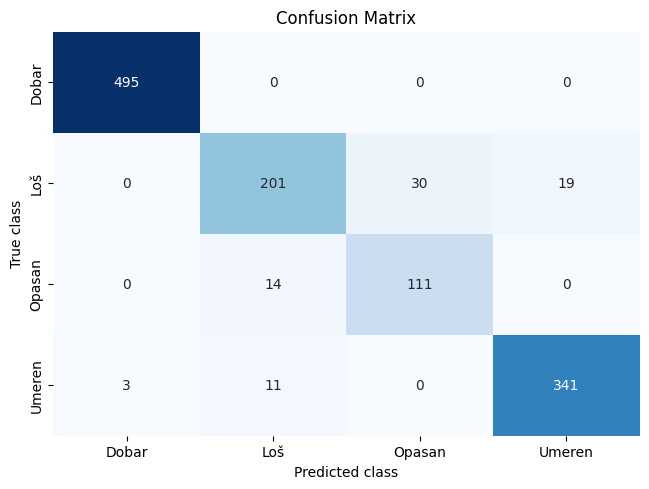

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga',max_iter=5000, class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_predicted = model.predict(features_test)

# Evaluation
report_lr_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_lr_std)
conf_matrix_lr_std = createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.988024,1.000000,0.993976,495.000000
Loš,0.893333,0.804000,0.846316,250.000000
Opasan,0.805755,0.896000,0.848485,125.000000
Umeren,0.938889,0.952113,0.945455,355.000000
macro avg,0.906500,0.913028,0.908558,1225.000000
weighted avg,0.935861,0.935510,0.934934,1225.000000
accuracy,nan,nan,0.935510,nan


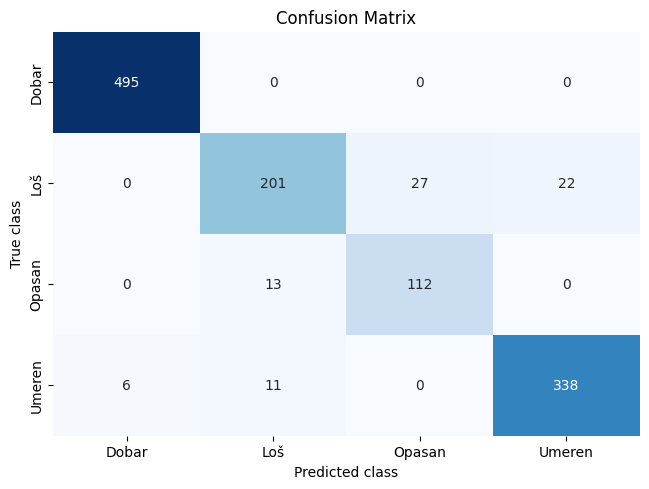

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target) 

# Fit logistic regression (multi-class)
model = LogisticRegression(solver='saga',max_iter=5000, class_weight='balanced',random_state=0)
model.fit(features_train, target_train)

# Predictions
target_predicted = model.predict(features_test)

# Evaluation
report_lr_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_lr_minmax)
conf_matrix_lr_minmax = createConfusionMatrix(target_test,target_predicted)

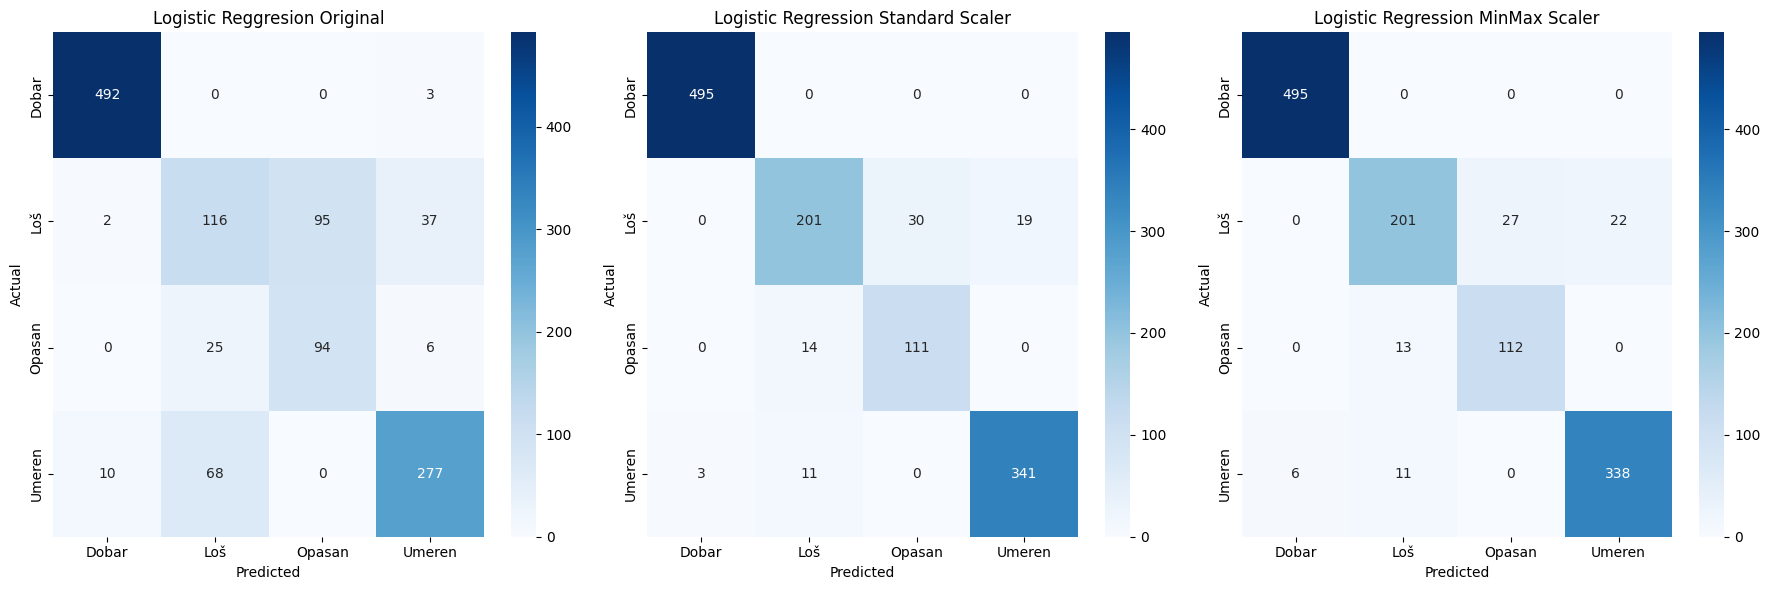

In [28]:
conf_matrixs = {"Logistic Reggresion Original":conf_matrix_lr, "Logistic Regression Standard Scaler":conf_matrix_lr_std,"Logistic Regression MinMax Scaler":conf_matrix_lr_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [29]:
showReports(dfs=[report_lr, report_lr_std, report_lr_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.976190,0.993939,0.984985,495.000000
Loš,0.555024,0.464000,0.505447,250.000000
Opasan,0.497354,0.752000,0.598726,125.000000
Umeren,0.857585,0.780282,0.817109,355.000000
macro avg,0.721539,0.747555,0.726567,1225.000000
weighted avg,0.807006,0.799184,0.799056,1225.000000
accuracy,nan,nan,0.799184,nan
,precision,recall,f1-score,support
Dobar,0.993976,1.000000,0.996979,495.000000
Loš,0.889381,0.804000,0.844538,250.000000


* Logistic Regression nad skaliranim skupom podataka dao je bolje rezultate
* Preciznost svih klasa se povećala kod Standardnog skaliranja, dok se dodatno povećala kod MinMax skaliranja
* Značajno poboljšanje detekcije klase "Loš" kod oba skaliranja
* *Zaključak:* Modifikacija skupa podataka ovom modelu omogućila bolju predikciju

### Random Forest

,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.870079,0.884000,0.876984,250.000000
Opasan,0.881356,0.832000,0.855967,125.000000
Umeren,0.958101,0.966197,0.962132,355.000000
macro avg,0.927384,0.920549,0.923771,1225.000000
weighted avg,0.949237,0.949388,0.949223,1225.000000
accuracy,nan,nan,0.949388,nan


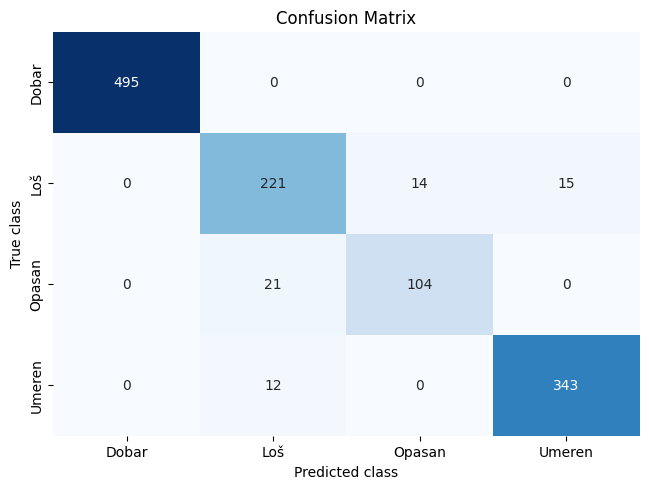

In [30]:
from sklearn.ensemble import RandomForestClassifier

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf_std)
conf_matrix_rf_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.870079,0.884000,0.876984,250.000000
Opasan,0.881356,0.832000,0.855967,125.000000
Umeren,0.958101,0.966197,0.962132,355.000000
macro avg,0.927384,0.920549,0.923771,1225.000000
weighted avg,0.949237,0.949388,0.949223,1225.000000
accuracy,nan,nan,0.949388,nan


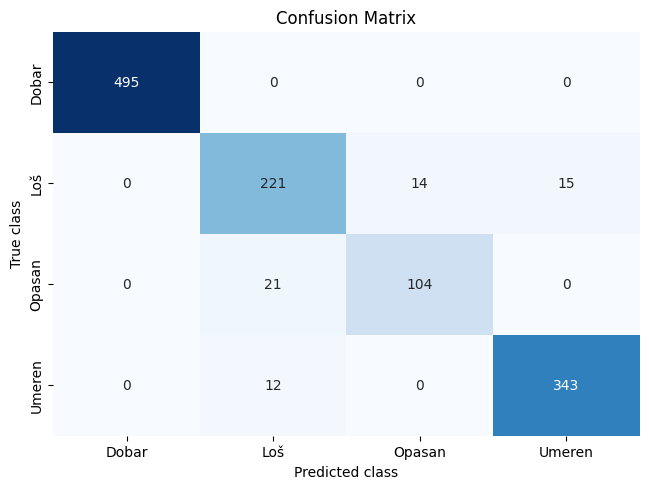

In [31]:
from sklearn.ensemble import RandomForestClassifier

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=0
)
rf.fit(features_train, target_train)
target_predicted = rf.predict(features_test)

report_rf_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,output_dict=True))
display(report_rf_minmax)
conf_matrix_rf_minmax=createConfusionMatrix(target_test,target_predicted)

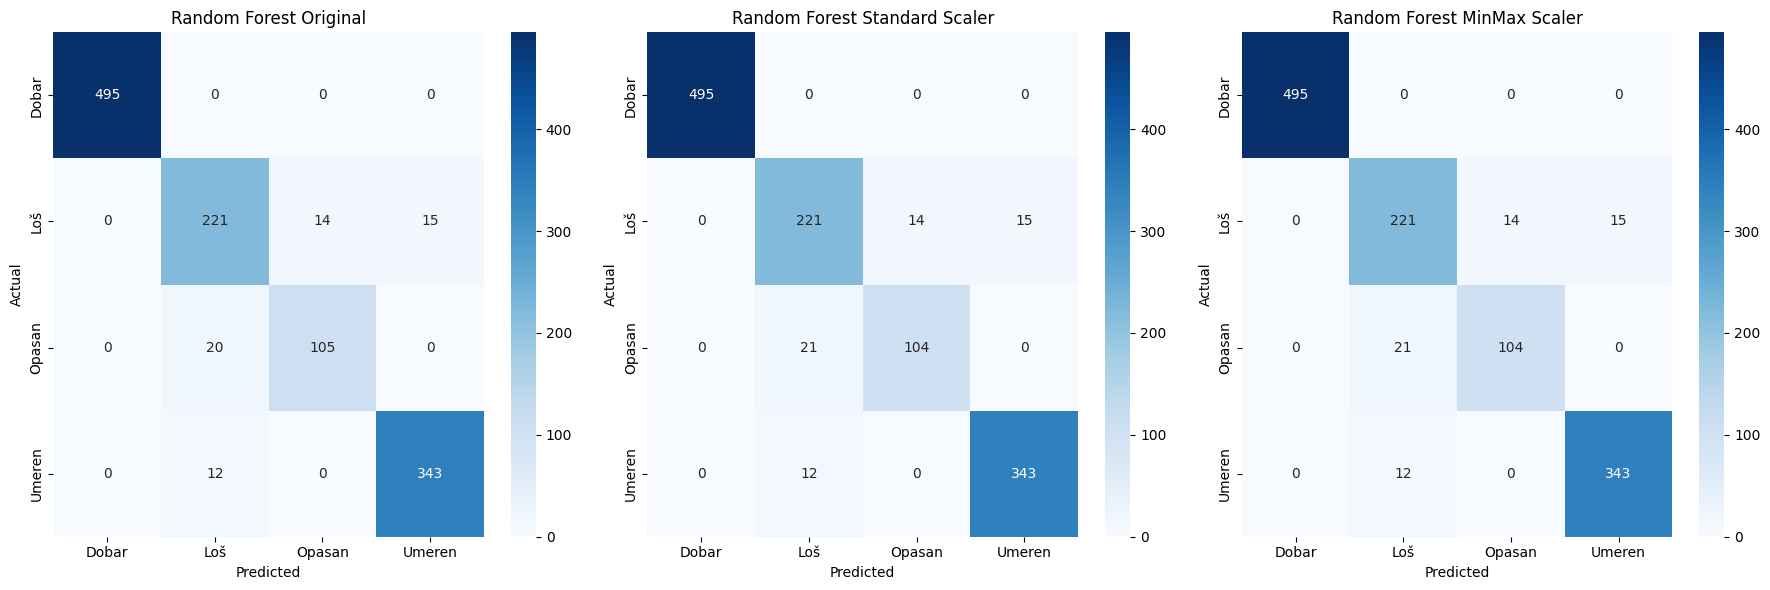

In [32]:
conf_matrixs = {"Random Forest Original":conf_matrix_rf, "Random Forest Standard Scaler":conf_matrix_rf_std,"Random Forest MinMax Scaler":conf_matrix_rf_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [33]:
showReports(dfs=[report_rf, report_rf_std, report_rf_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.873518,0.884000,0.878728,250.000000
Opasan,0.882353,0.840000,0.860656,125.000000
Umeren,0.958101,0.966197,0.962132,355.000000
macro avg,0.928493,0.922549,0.925379,1225.000000
weighted avg,0.950040,0.950204,0.950058,1225.000000
accuracy,nan,nan,0.950204,nan
,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.870079,0.884000,0.876984,250.000000


* Odziv kod klase "Loš" je blago porastao dok se drugi rezultati gotovo nisu menjali
* *Zaključak:* Random Forest je dao najbolje rezultate predikcije, s time da se može dodatno poboljšati uz MinMax skaliranje

### Support Vector Machine

,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.887967,0.856000,0.871690,250.000000
Opasan,0.873950,0.832000,0.852459,125.000000
Umeren,0.943243,0.983099,0.962759,355.000000
macro avg,0.926290,0.917775,0.921727,1225.000000
weighted avg,0.947826,0.948571,0.947967,1225.000000
accuracy,nan,nan,0.948571,nan


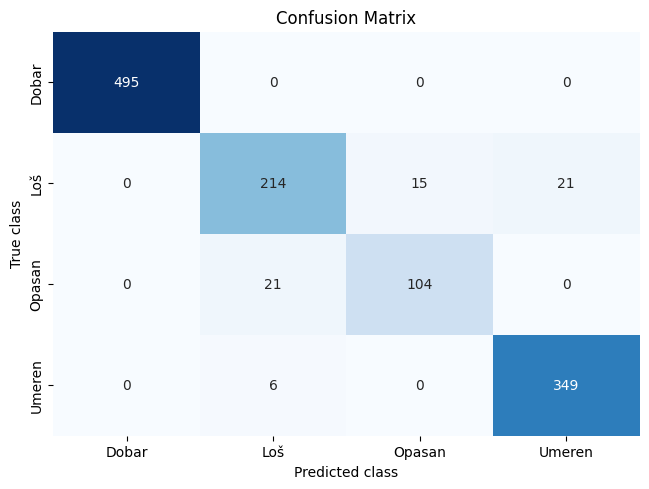

In [34]:
from sklearn.svm import SVC

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc_std)
conf_matrix_svc_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.894515,0.848000,0.870637,250.000000
Opasan,0.861789,0.848000,0.854839,125.000000
Umeren,0.943243,0.983099,0.962759,355.000000
macro avg,0.924887,0.919775,0.922058,1225.000000
weighted avg,0.947921,0.948571,0.947995,1225.000000
accuracy,nan,nan,0.948571,nan


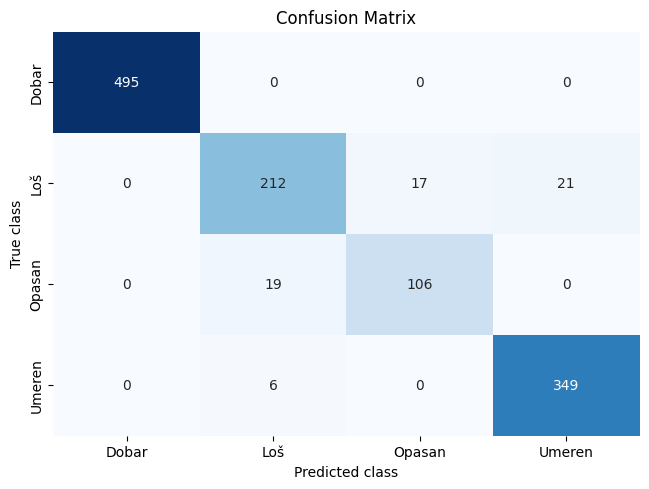

In [35]:
from sklearn.svm import SVC

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

clf = SVC(kernel='rbf',decision_function_shape='ovo') #ovr ili ovo

clf.fit(features_train, target_train)

target_predicted = clf.predict(features_test)

report_svc_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_svc_minmax)
conf_matrix_svc_minmax=createConfusionMatrix(target_test,target_predicted)

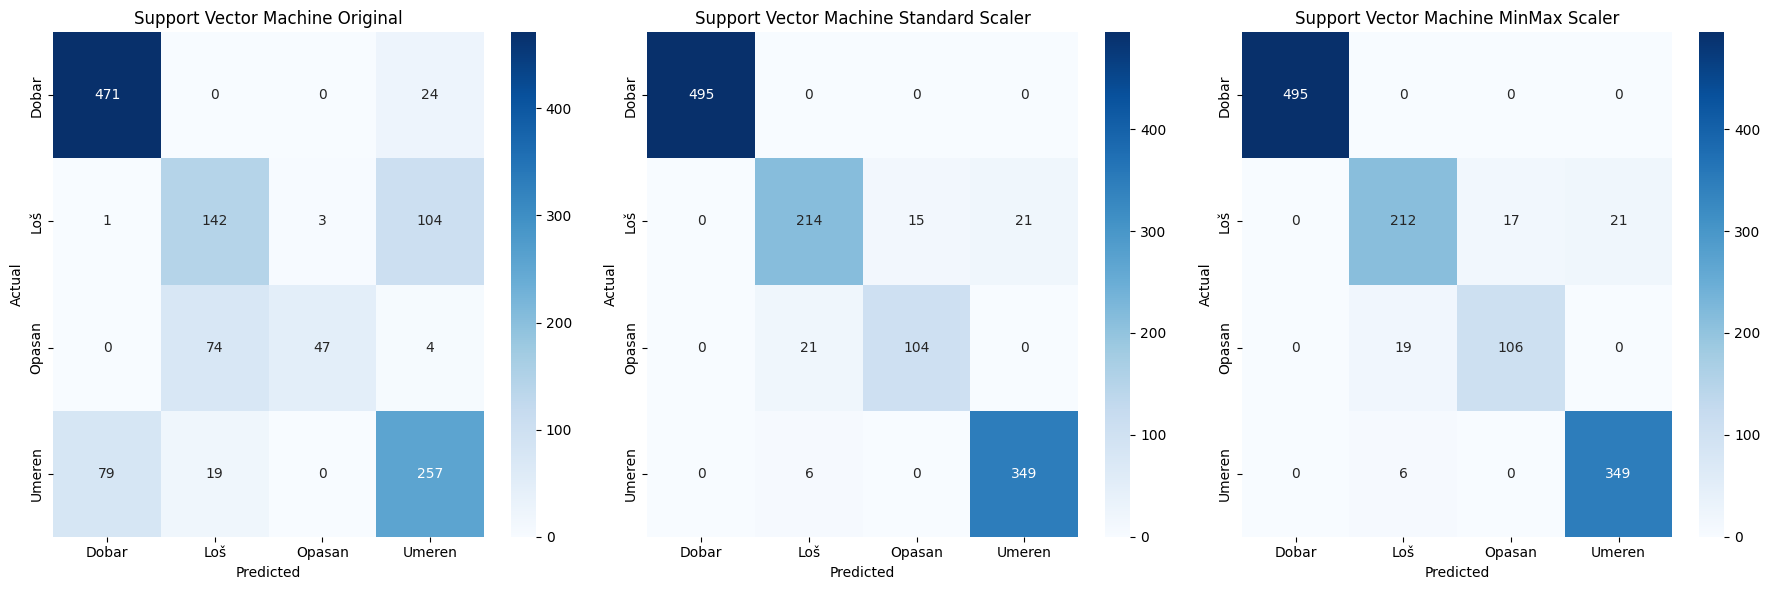

In [36]:
conf_matrixs = {"Support Vector Machine Original":conf_matrix_svc, "Support Vector Machine Standard Scaler":conf_matrix_svc_std,"Support Vector Machine MinMax Scaler":conf_matrix_svc_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [37]:
showReports(dfs=[report_svc, report_svc_std, report_svc_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.854809,0.951515,0.900574,495.000000
Loš,0.604255,0.568000,0.585567,250.000000
Opasan,0.940000,0.376000,0.537143,125.000000
Umeren,0.660668,0.723944,0.690860,355.000000
macro avg,0.764933,0.654865,0.678536,1225.000000
weighted avg,0.756108,0.748571,0.738428,1225.000000
accuracy,nan,nan,0.748571,nan
,precision,recall,f1-score,support
Dobar,1.000000,1.000000,1.000000,495.000000
Loš,0.887967,0.856000,0.871690,250.000000


* Support Vector Machine je postigao značajno bolje rezultate nakon primene skaliranja nego pri radu sa originalnim skupom podataka
* Odziv kod klasa "Opasan" i "Loš" se dosta povećao u odnosu na primenu ovog modela nad originalnim skupom podataka
* Ostaje problem niskog odziva klase "Opasan", doduše prilikom skaliranja pogrešno je identifikovao kao klasa "Loš" što možemo smatrati da nije velika greška
* *Zaključak:* Model je imao veliko poboljšanje performansi usled skaliranja podataka, mada ostaje problem tačne detekcije klase "Opasan"

### Multinomial Naive Bayes

,precision,recall,f1-score,support
Dobar,0.602923,1.000000,0.752280,495.000000
Loš,0.000000,0.000000,0.000000,250.000000
Opasan,1.000000,0.000000,0.000000,125.000000
Umeren,0.130000,0.146479,0.137748,355.000000
macro avg,0.433231,0.286620,0.222507,1225.000000
weighted avg,0.383345,0.446531,0.343901,1225.000000
accuracy,nan,nan,0.446531,nan


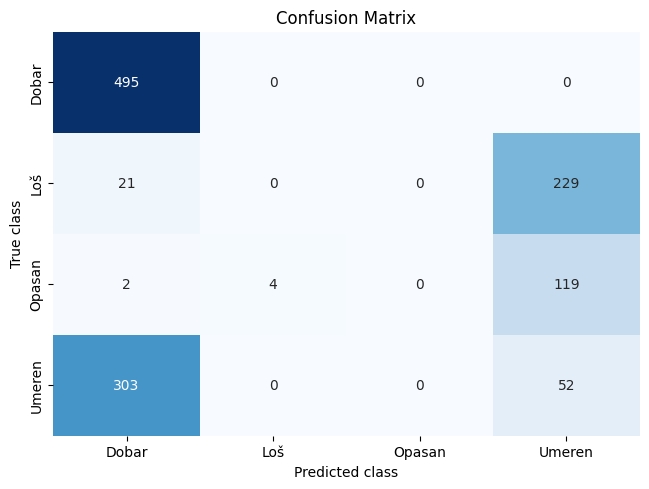

In [38]:
from sklearn.naive_bayes import MultinomialNB

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

nb = MultinomialNB()
nb.fit(features_train, target_train)

target_predicted = nb.predict(features_test)

report_nb_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_nb_minmax)
conf_matrix_nb_minmax=createConfusionMatrix(target_test,target_predicted)

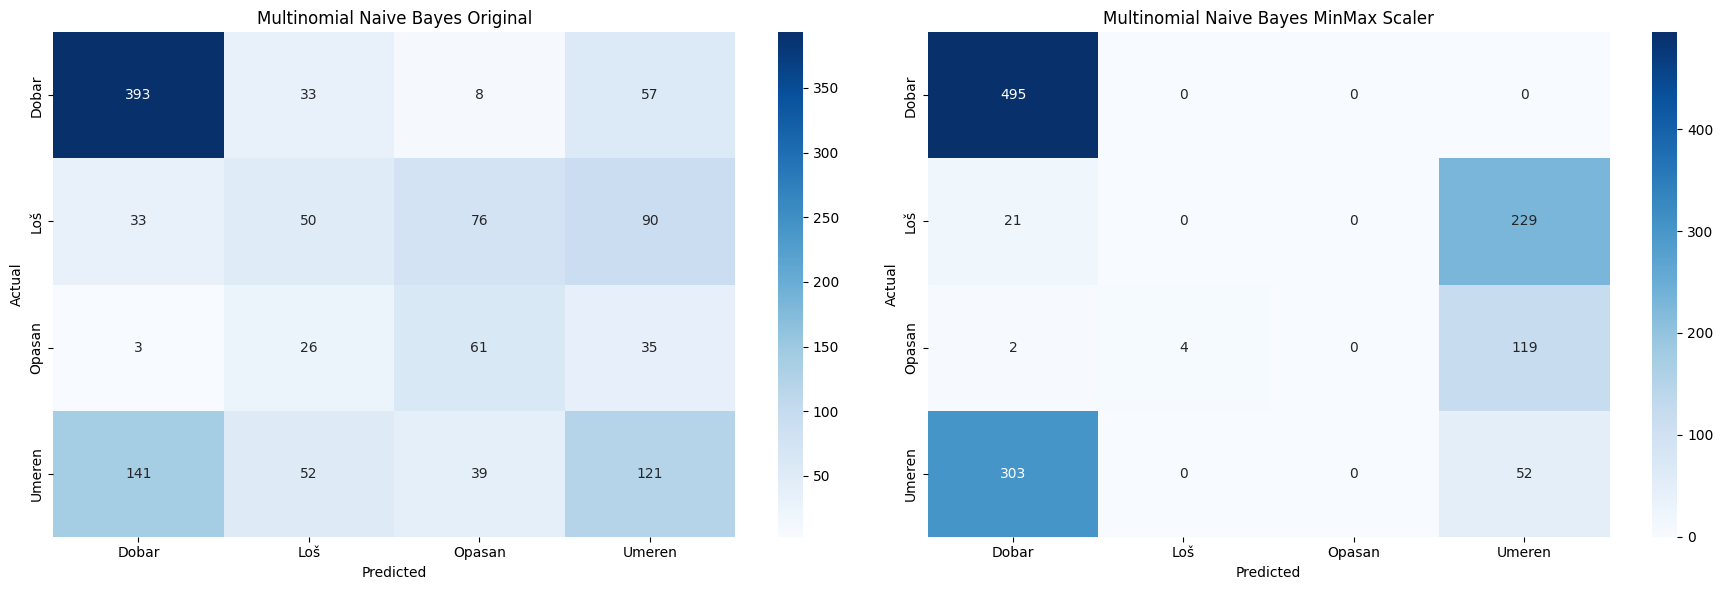

In [39]:
conf_matrixs = {"Multinomial Naive Bayes Original":conf_matrix_nb, "Multinomial Naive Bayes MinMax Scaler":conf_matrix_nb_minmax}
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [40]:
showReports(dfs=[report_nb, report_nb_minmax],titles=['Original','MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.689474,0.800407,0.740811,491.000000
Loš,0.310559,0.200803,0.243902,249.000000
Opasan,0.331522,0.488000,0.394822,125.000000
Umeren,0.399340,0.342776,0.368902,353.000000
macro avg,0.432724,0.457997,0.437109,1218.000000
weighted avg,0.491189,0.513136,0.495932,1218.000000
accuracy,nan,nan,0.513136,nan
,precision,recall,f1-score,support
Dobar,0.602923,1.000000,0.752280,495.000000
Loš,0.000000,0.000000,0.000000,250.000000


* Primena Standard Scaler-a nije bila moguća budući da Multinomial Naive Bayes radi samo sa pozitivnim vrednostima
* Odziv i f1 je kod klasa "Opasan" i "Loš" nula, što znači da nije detektovana nijedna objekat ove klase
* *Zaključak:* Ovakav model je do sada dao najlošije rezultate nakon što se primenilo skaliranje skupa podataka

### KNN (K-Nearest Neighbors)

,precision,recall,f1-score,support
Dobar,0.986056,1.000000,0.992979,495.000000
Loš,0.798535,0.872000,0.833652,250.000000
Opasan,0.943820,0.672000,0.785047,125.000000
Umeren,0.925208,0.940845,0.932961,355.000000
macro avg,0.913405,0.871211,0.886160,1225.000000
weighted avg,0.925843,0.923265,0.921853,1225.000000
accuracy,nan,nan,0.923265,nan


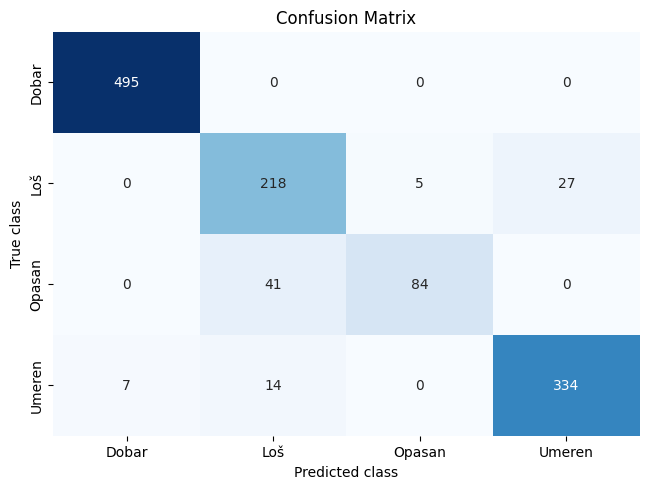

In [41]:
from sklearn.neighbors import KNeighborsClassifier

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train, target_train)

target_predicted = knn.predict(features_test)

report_knn_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_std)
conf_matrix_knn_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.988024,1.000000,0.993976,495.000000
Loš,0.807407,0.872000,0.838462,250.000000
Opasan,0.944444,0.680000,0.790698,125.000000
Umeren,0.925824,0.949296,0.937413,355.000000
macro avg,0.916425,0.875324,0.890137,1225.000000
weighted avg,0.928691,0.926531,0.925104,1225.000000
accuracy,nan,nan,0.926531,nan


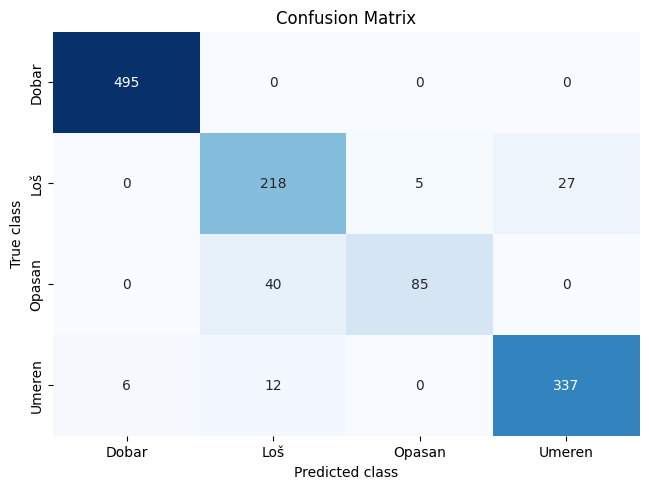

In [42]:
from sklearn.neighbors import KNeighborsClassifier

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train, target_train)

target_predicted = knn.predict(features_test)

report_knn_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_minmax)
conf_matrix_knn_minmax=createConfusionMatrix(target_test,target_predicted)

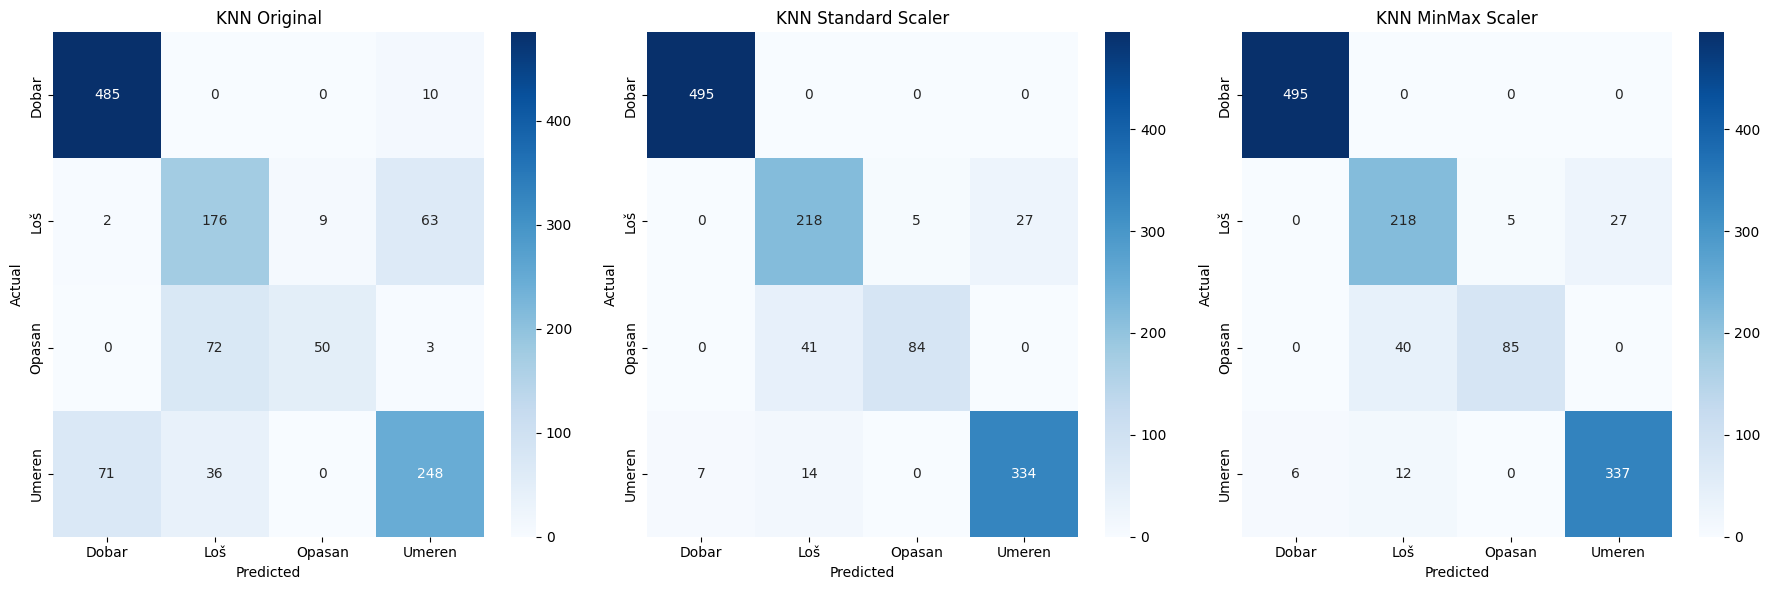

In [43]:
conf_matrixs = {"KNN Original":conf_matrix_knn, "KNN Standard Scaler":conf_matrix_knn_std,"KNN MinMax Scaler":conf_matrix_knn_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [44]:
showReports(dfs=[report_knn, report_knn_std, report_knn_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.869176,0.979798,0.921178,495.000000
Loš,0.619718,0.704000,0.659176,250.000000
Opasan,0.847458,0.400000,0.543478,125.000000
Umeren,0.765432,0.698592,0.730486,355.000000
macro avg,0.775446,0.695597,0.713579,1225.000000
weighted avg,0.785985,0.782857,0.773905,1225.000000
accuracy,nan,nan,0.782857,nan
,precision,recall,f1-score,support
Dobar,0.986056,1.000000,0.992979,495.000000
Loš,0.798535,0.872000,0.833652,250.000000


* Uvođenjem skaliranja skupa podataka odziv klase "Dobar" je dostigao 1, čime su sve predikcije tačne
* Odziv klasa "Loš" i "Opasan" se povećao, pri čemu je malo veće povećanje prilikom pirmene MinMax skaliranja
* Opšta tačnost predikcije je dostigla nivo Random Forest modela, ali je detekcija klase "Opasan" ipak malo slabija
* *Zaključak:* Uveđenje skaliranja kod ovog modela je dovelo do poboljšanja rezultata, čime je ovam model postao drugi najbolji od do sada testiranih modela

### KNN PCA

,precision,recall,f1-score,support
Dobar,0.980119,0.995960,0.987976,495.000000
Loš,0.779412,0.848000,0.812261,250.000000
Opasan,0.861111,0.744000,0.798283,125.000000
Umeren,0.926901,0.892958,0.909613,355.000000
macro avg,0.886886,0.870229,0.877033,1225.000000
weighted avg,0.911592,0.910204,0.910050,1225.000000
accuracy,nan,nan,0.910204,nan


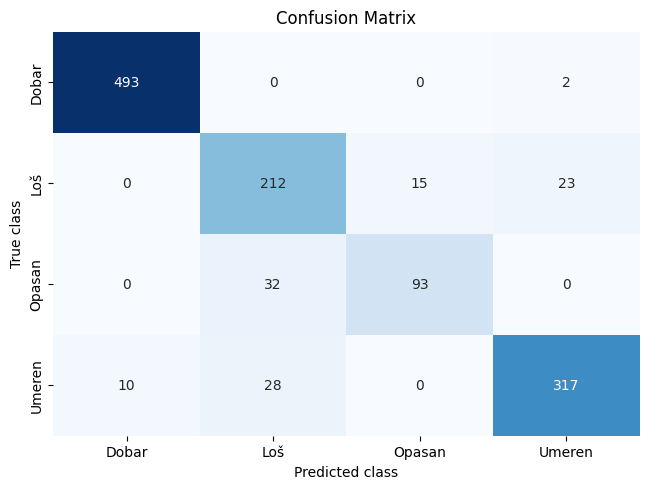

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

features,target=df_std.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train_pca, target_train)

target_predicted = knn.predict(features_test_pca)

report_knn_pca_std=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_pca_std)
conf_matrix_knn_pca_std=createConfusionMatrix(target_test,target_predicted)

,precision,recall,f1-score,support
Dobar,0.986028,0.997980,0.991968,495.000000
Loš,0.788889,0.852000,0.819231,250.000000
Opasan,0.872549,0.712000,0.784141,125.000000
Umeren,0.928977,0.921127,0.925035,355.000000
macro avg,0.894111,0.870777,0.880094,1225.000000
weighted avg,0.917683,0.916735,0.916112,1225.000000
accuracy,nan,nan,0.916735,nan


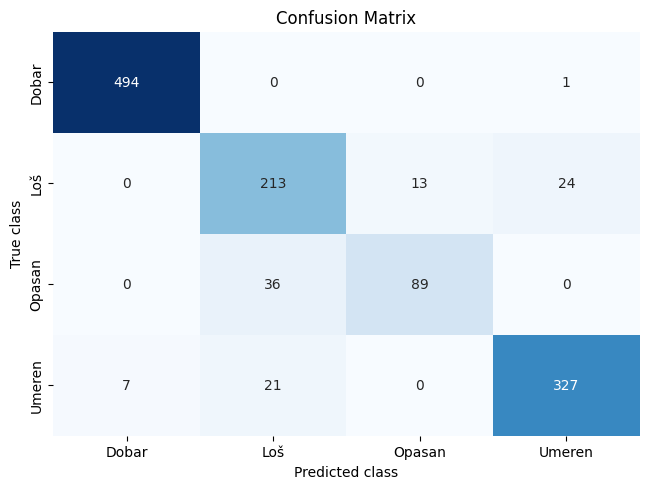

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

features,target=df_minmax.drop('Kvalitet_Vazduha',axis=1),df['Kvalitet_Vazduha']
features_train,features_test,target_train,target_test = train_test_split(features,target,random_state=0,stratify=target)

pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)

knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

knn.fit(features_train_pca, target_train)

target_predicted = knn.predict(features_test_pca)

report_knn_pca_minmax=createTableReport(classification_report(target_test, target_predicted, target_names=encoder.classes_,zero_division=1,output_dict=True))
display(report_knn_pca_minmax)
conf_matrix_knn_pca_minmax=createConfusionMatrix(target_test,target_predicted)

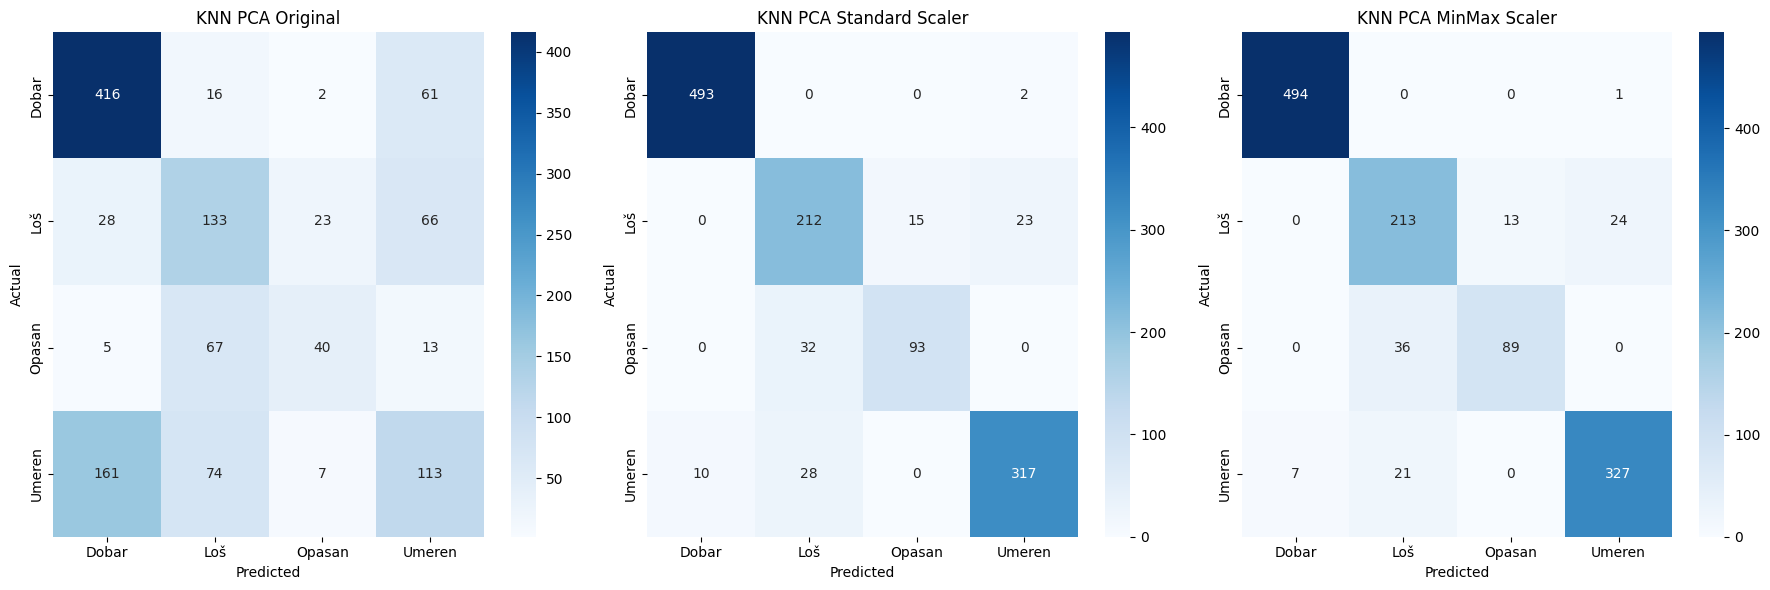

In [47]:
conf_matrixs = {"KNN PCA Original":conf_matrix_knn_pca, "KNN PCA Standard Scaler":conf_matrix_knn_pca_std,"KNN PCA MinMax Scaler":conf_matrix_knn_pca_minmax}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 reda x 1 kolona
axes = axes.flatten()  # flatten to make it easier to index

for idx, (model_name, conf) in enumerate(conf_matrixs.items()):
    #seaborn.heatmap(data=conf,annot=True,cbar=None,cmap='Blues',fmt='.0f')
    seaborn.heatmap(conf, annot=True,cbar=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(model_name)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

for j in range(len(conf_matrixs), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [48]:
showReports(dfs=[report_knn_pca, report_knn_pca_std, report_knn_pca_minmax],titles=['Original','Standard Scaled', 'MinMax Scaled'])

,precision,recall,f1-score,support
Dobar,0.681967,0.840404,0.752941,495.000000
Loš,0.458621,0.532000,0.492593,250.000000
Opasan,0.555556,0.320000,0.406091,125.000000
Umeren,0.446640,0.318310,0.371711,355.000000
macro avg,0.535696,0.502678,0.505834,1225.000000
weighted avg,0.555290,0.573061,0.553937,1225.000000
accuracy,nan,nan,0.573061,nan
,precision,recall,f1-score,support
Dobar,0.980119,0.995960,0.987976,495.000000
Loš,0.779412,0.848000,0.812261,250.000000


* Uvođenje skaliranja podataka je dovelo do značajnog poboljšanja predikcije na noviu svih klasa
* Malo bolje rezultate je dalo MinMax skaliranje u odnosu na Standardn skaler
* U odnosu na original, klasa "Opasan" sada ima odziv 0.71 dok je ranije imala svega 0.32 
* *Zaključak:* Skaliranje je dosta pomoglo KNN modelu sa PCA redukcijom dimenzionalnosti, ali je ipak osnovni KNN dao malo bolje rezultate